In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, _tree, export_graphviz
import graphviz

In [3]:
df = pd.read_csv("US_Accidents_Dec20_updated_cleaned_imputed_data_prepared.csv")

In [4]:
X, y = df.drop(["Severity"], axis=1), df["Severity"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
#     print("def tree({}):".format(", ".join(feature_names)))
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            a, b, c, d = tree_.value[node][0]
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [84]:
unique_classes = np.unique(y_train)
dtr_class_weight = {(key+1): value for key, value in enumerate(compute_class_weight("balanced", unique_classes, y_train))}

In [85]:
dtr_model_1 = DecisionTreeClassifier(max_depth=1, class_weight=dtr_class_weight, random_state=0)
_ = dtr_model_1.fit(X_train, y_train)

In [86]:
tree_to_code(dtr_model_1, X_train.columns)

  if Month_Of_Year_cos <= 0.25000000000000006:
    return [[301466.9836906  116051.88054951 200569.82456537 174154.12175913]]
  else:  # if Month_Of_Year_cos > 0.25000000000000006
    return [[  1745.7663094  187160.86945219 102642.92543468 129058.62824083]]


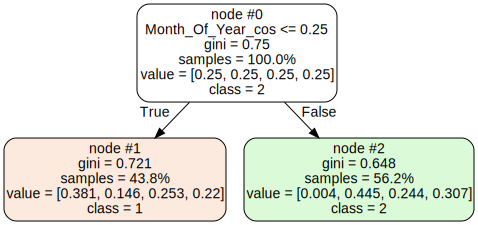

In [87]:
dot_data = export_graphviz(
    dtr_model_1, 
    out_file=None, 
    proportion=True, 
    filled=True, 
    node_ids=True, 
    rounded=True, 
    feature_names=X_train.columns,
    class_names=["1","2","3","4"]
) 
graph = graphviz.Source(dot_data, format="png") 
graph

In [88]:
dtr_model_2 = DecisionTreeClassifier(max_depth=2, class_weight=dtr_class_weight, random_state=0)
_ = dtr_model_2.fit(X_train, y_train)

In [89]:
tree_to_code(dtr_model_2, X_train.columns)

  if Month_Of_Year_cos <= 0.25000000000000006:
    if Month_Of_Year_sin <= -0.24999999999999994:
      return [[  711.73549537 46647.2016229  54690.38878572 63480.27289894]]
    else:  # if Month_Of_Year_sin > -0.24999999999999994
      return [[300755.24819522  69404.67892631 145879.43577982 110673.84886028]]
  else:  # if Month_Of_Year_cos > 0.25000000000000006
    if Fair <= 0.5:
      return [[   966.88595598 109954.25208412  93808.016736   107151.59336682]]
    else:  # if Fair > 0.5
      return [[  778.88035343 77206.61736777  8834.90869865 21907.03487398]]


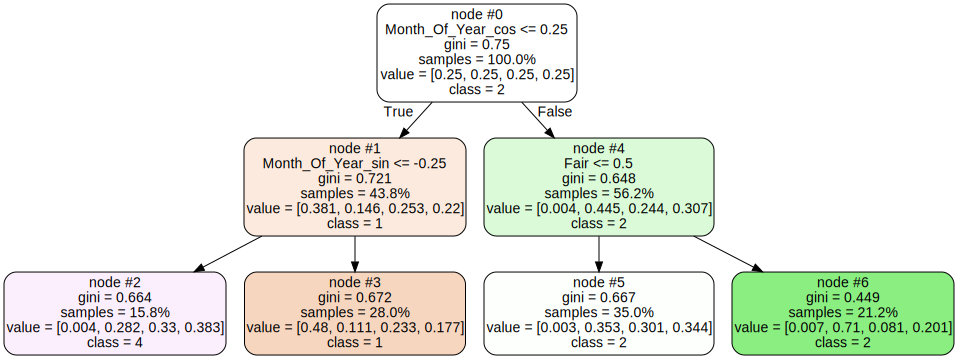

In [90]:
dot_data = export_graphviz(
    dtr_model_2, 
    out_file=None, 
    proportion=True, 
    filled=True, 
    node_ids=True, 
    rounded=True, 
    feature_names=X_train.columns,
    class_names=["1","2","3","4"]
) 
graph = graphviz.Source(dot_data, format="png") 
graph

In [91]:
dtr_model_3 = DecisionTreeClassifier(max_depth=3, class_weight=dtr_class_weight, random_state=0)
_ = dtr_model_3.fit(X_train, y_train)

In [92]:
tree_to_code(dtr_model_3, X_train.columns)

  if Month_Of_Year_cos <= 0.25000000000000006:
    if Month_Of_Year_sin <= -0.24999999999999994:
      if CA <= 0.5:
        return [[  644.59063732 31535.67400857 47157.91207723 59310.66601885]]
      else:  # if CA > 0.5
        return [[   67.14485805 15111.52761424  7532.47670848  4169.60688009]]
    else:  # if Month_Of_Year_sin > -0.24999999999999994
      if Crossing <= 0.5:
        return [[204214.37128526  64583.094724   138426.89172058 104080.82396866]]
      else:  # if Crossing > 0.5
        return [[96540.87690996  4821.58420227  7452.54405927  6593.02489161]]
  else:  # if Month_Of_Year_cos > 0.25000000000000006
    if Fair <= 0.5:
      if CA <= 0.5:
        return [[   966.88595598  80761.22278559  81025.8457422  101046.57182821]]
      else:  # if CA > 0.5
        return [[    0.         29193.02929827 12782.17099377  6105.0215386 ]]
    else:  # if Fair > 0.5
      if CA <= 0.5:
        return [[  778.88035343 43168.87126637  7958.00051755 20389.90880376]]
      else:

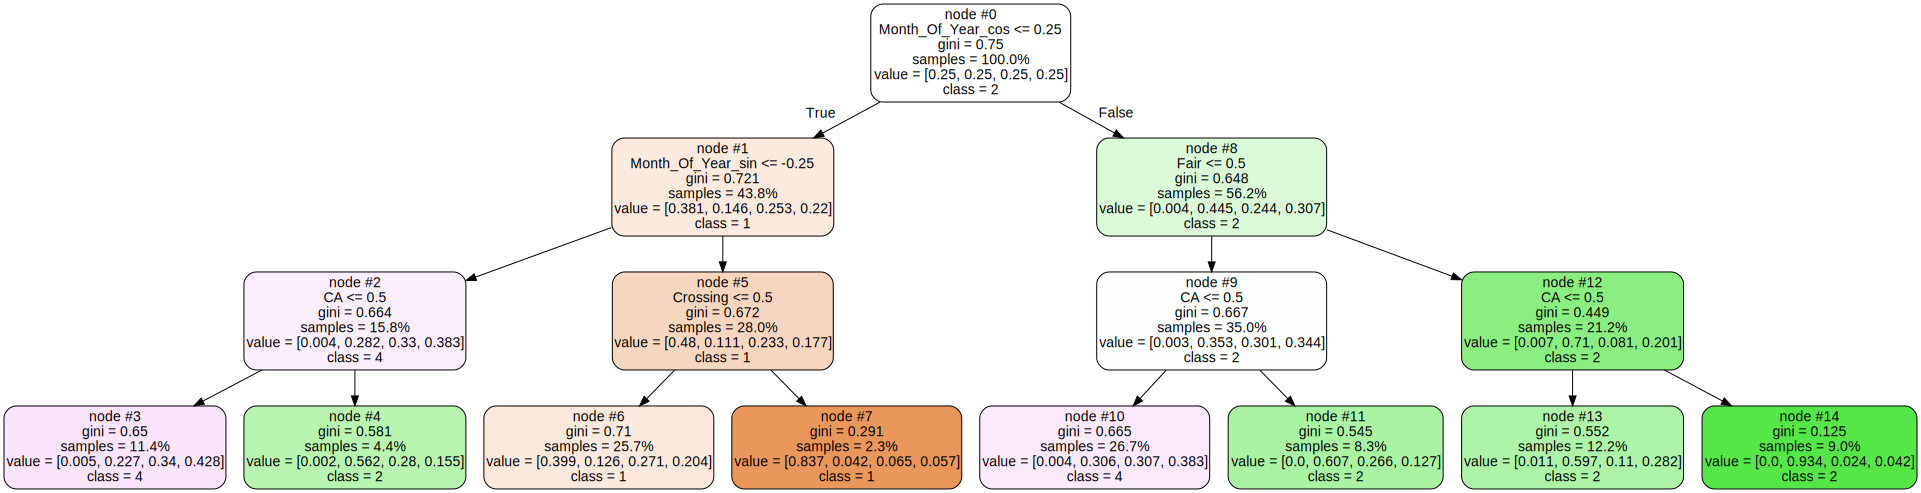

In [93]:
dot_data = export_graphviz(
    dtr_model_3, 
    out_file=None, 
    proportion=True, 
    filled=True, 
    node_ids=True, 
    rounded=True, 
    feature_names=X_train.columns,
    class_names=["1","2","3","4"]
) 
graph = graphviz.Source(dot_data, format="png") 
graph

In [98]:
dtr_model_3_without_CA = DecisionTreeClassifier(max_depth=3, class_weight=dtr_class_weight, random_state=0)
_ = dtr_model_3.fit(X_train.drop("CA", axis=1), y_train)

In [99]:
tree_to_code(dtr_model_3, [col for col in X_train.columns if col != "CA"])

  if Month_Of_Year_cos <= 0.25000000000000006:
    if Month_Of_Year_sin <= -0.24999999999999994:
      if Side <= 0.5:
        return [[  161.14765933  5524.62769753  4314.0120974  15433.5210076 ]]
      else:  # if Side > 0.5
        return [[  550.58783604 41122.57392533 50376.37668832 48046.75189136]]
    else:  # if Month_Of_Year_sin > -0.24999999999999994
      if Crossing <= 0.5:
        return [[204214.37128526  64583.094724   138426.89172058 104080.82396866]]
      else:  # if Crossing > 0.5
        return [[96540.87690996  4821.58420227  7452.54405927  6593.02489161]]
  else:  # if Month_Of_Year_cos > 0.25000000000000006
    if Fair <= 0.5:
      if Wind_Speed(mph) <= 3.4344512224197388:
        return [[  282.00840383 20332.61808014  2430.89292028  6277.64857504]]
      else:  # if Wind_Speed(mph) > 3.4344512224197388
        return [[   684.87755215  89621.63400382  91377.12381572 100873.94479177]]
    else:  # if Fair > 0.5
      if Precipitation(in) <= 0.005231250543147325

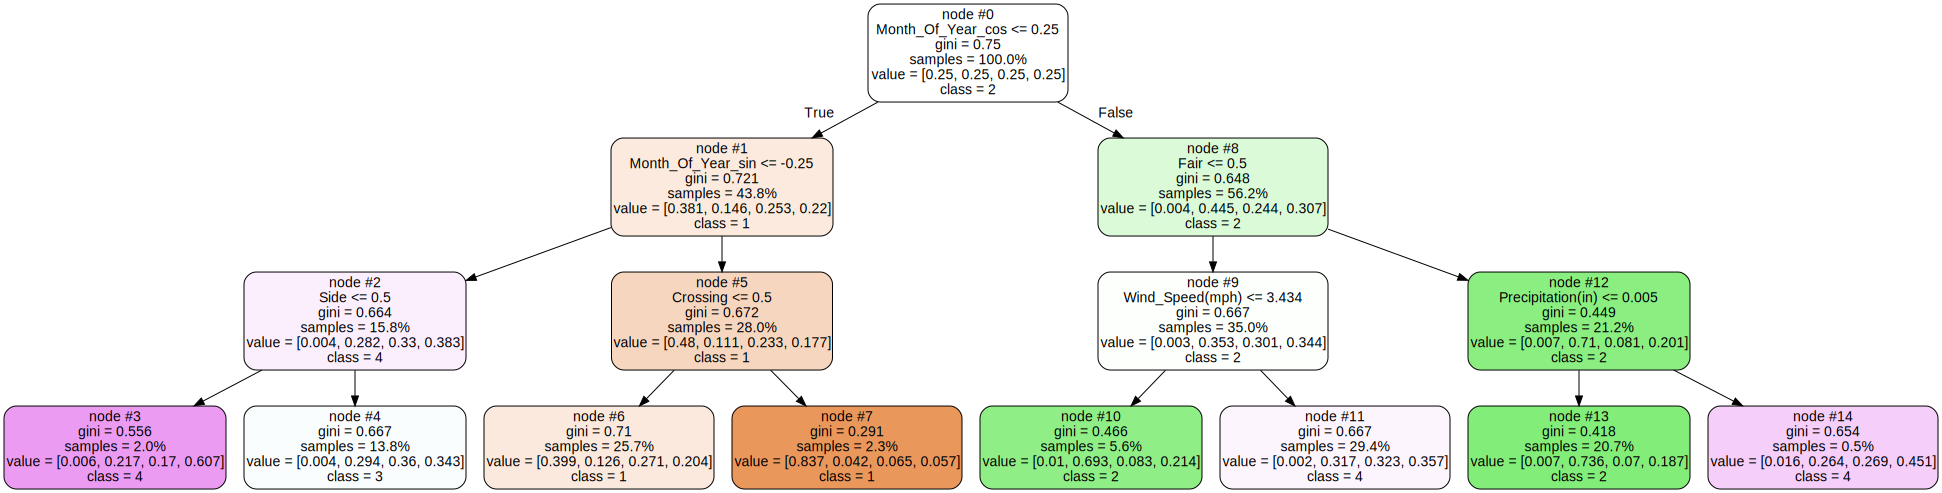

In [100]:
dot_data = export_graphviz(
    dtr_model_3, 
    out_file=None, 
    proportion=True, 
    filled=True, 
    node_ids=True, 
    rounded=True, 
    feature_names=[col for col in X_train.columns if col != "CA"],
    class_names=["1","2","3","4"]
) 
graph = graphviz.Source(dot_data, format="png") 
graph